# <font  size=4 > Before starting, we need import the module that will be used</font>

In [ ]:
%matplotlib qt
import mne
import os
from mne_bids import write_raw_bids,make_bids_basename
from mne.preprocessing import ICA
import sys
print('Python v{}'.format(sys.version))
print('MNE v{}'.format(mne.__version__))


In [80]:
raw_fname=('BIDS/sub-05/eeg/sub-05_task-learning_eeg.vhdr')#define raw data path 

# <font size=4>We need define the montage before we read the raw data<font>

In [87]:
montage=mne.channels.make_standard_montage('standard_1020')#read the standard montage
raw = mne.io.read_raw_brainvision(raw_fname,montage=montage,preload=True)#read raw data with mne 

Extracting parameters from BIDS/sub-05/eeg/sub-05_task-learning_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 1329882  =      0.000 ...  2659.764 secs...
DigMontage is a superset of info. 31 in DigMontage will be ignored. The ignored channels are: {'T6', 'P9', 'AF9', 'TP9', 'T4', 'CPz', 'A2', 'AFz', 'F9', 'AF2', 'T10', 'F10', 'TP10', 'FT10', 'Iz', 'AF10', 'T3', 'AF1', 'A1', 'T5', 'PO10', 'P10', 'PO1', 'T9', 'O10', 'AF6', 'PO9', 'O9', 'PO2', 'AF5', 'FT9'}


<ipython-input-87-2291f055245a>:2: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_brainvision(raw_fname,montage=montage,preload=True)#read raw data with mne
<ipython-input-87-2291f055245a>:2: DeprecationWarning: The `montage` parameter from `read_raw_brainvision` is deprecated and will be removed  in version 0.20. Use  raw.set_montage(montage) instead.
  raw = mne.io.read_raw_brainvision(raw_fname,montage=montage,preload=True)#read raw data with mne


In [88]:
raw.info

<Info | 17 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fpz, Fp2, AF7, AF3, AF4, AF8, F7, F5, ...
    chs : list | 63 items (EEG: 63)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : Digitization | 66 items (3 Cardinal, 63 EEG)
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 250.0 Hz
    meas_date : tuple | 2019-08-05 21:50:29 GMT
    nchan : int | 63
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 500.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj

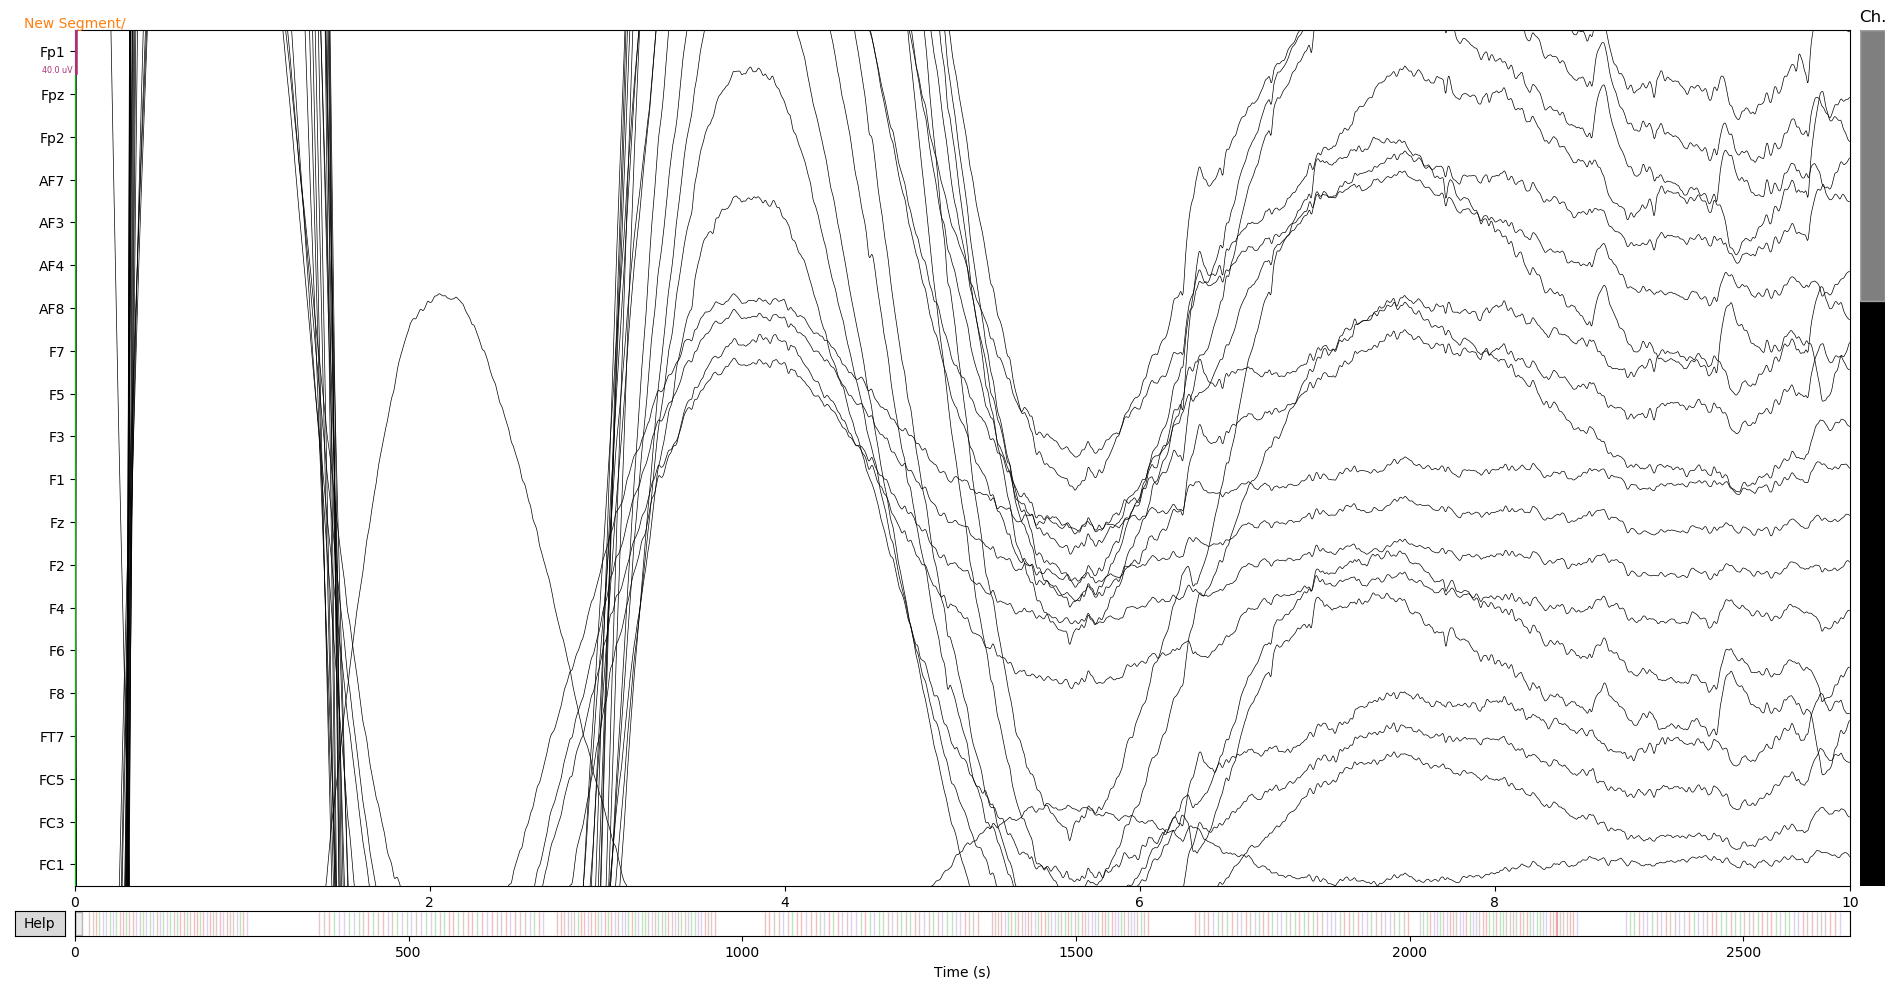

In [85]:
raw.plot()

Effective window size : 4.096 (s)


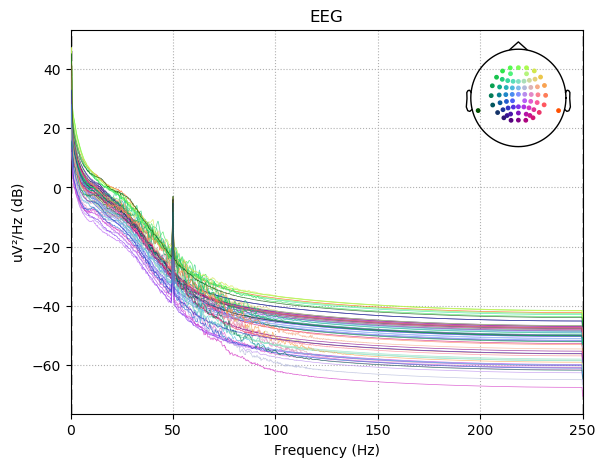

In [89]:
raw.plot_psd()

Effective window size : 4.096 (s)


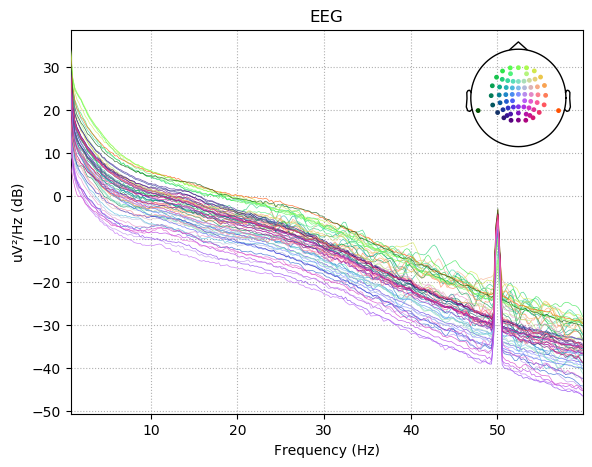

In [90]:
raw.plot_psd(fmax=60,fmin=0.5)

In [91]:
raw.filter(l_freq=0.5,h_freq=None,fir_design='firwin')#high pass filter with fir filter
raw.filter(l_freq=None,h_freq=40,fir_design='firwin')#low pass filter  with fir filter

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 3301 samples (6.602 sec)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 165 samples (0.330 sec)



<RawBrainVision  |  sub-05_task-learning_eeg.eeg, n_channels x n_times : 63 x 1329883 (2659.8 sec), ~639.4 MB, data loaded>

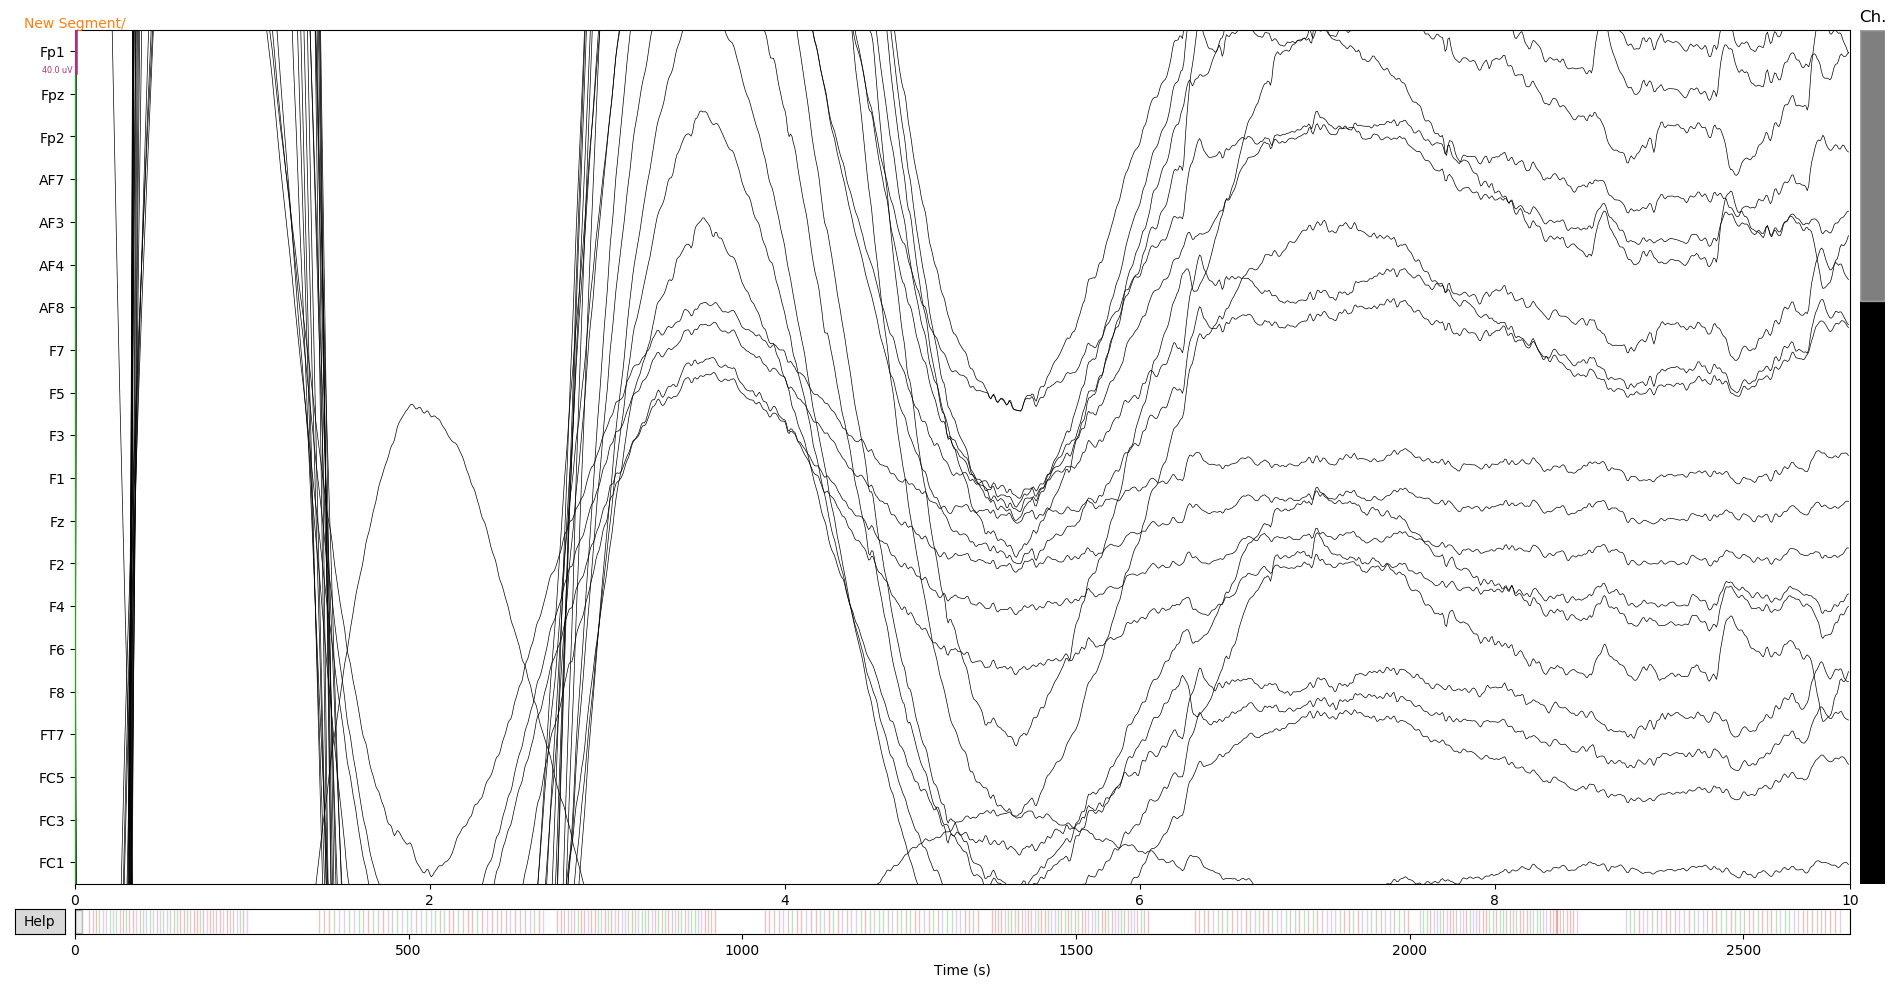

In [92]:
raw.plot()

Effective window size : 4.096 (s)


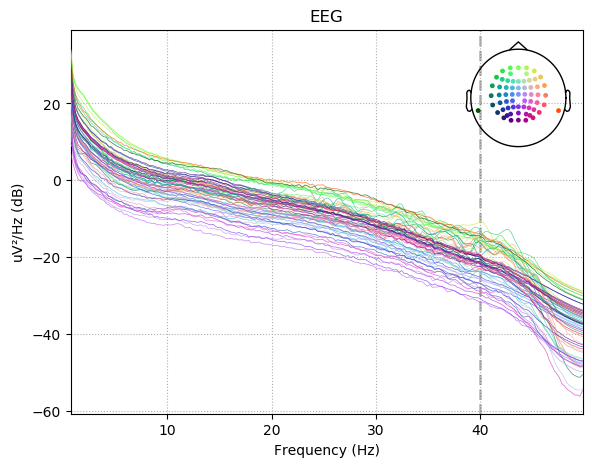

In [93]:
raw.plot_psd(fmax=50,fmin=0.5)

In [94]:
events,events_id=mne.events_from_annotations(raw,event_id='auto')#read events from raw annotations

Used Annotations descriptions: ['Marker/Impedance', 'New Segment/', 'Stimulus/s11', 'Stimulus/s22', 'Stimulus/s33', 'Stimulus/s44']


In [95]:
events_id

{'Marker/Impedance': 10001,
 'New Segment/': 99999,
 'Stimulus/s11': 10002,
 'Stimulus/s22': 10003,
 'Stimulus/s33': 10004,
 'Stimulus/s44': 10005}

In [96]:
events_id={'baby':10002,'people':10003,'animal':10004,'scene':10005}#redifine the events_id

In [97]:
events = mne.pick_events(events, include=[10002,10003,10004,10005])#pick events that we interested

In [98]:
epochs = mne.Epochs(raw,events=events,event_id=events_id,baseline=None,
                        preload=True,tmin=-0.5,tmax=1,reject=dict(eeg=300e-6),
                       flat=dict(eeg=1e-6))#epoch and reject those larger than 300 lower than 1 micro 

384 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 384 events and 751 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'Fpz', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fpz', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fpz', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fpz', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fpz', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fpz', 'Fp2']
    Rejecting  epoch based on EEG : ['AF7']
    Rejecting  epoch based on EEG : ['Fp1', 'Fpz', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['F5']
    Rejecting  epoch based on EEG : ['Fp1', 'Fpz', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fpz', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fpz', 'Fp2']
15 bad epochs dropped


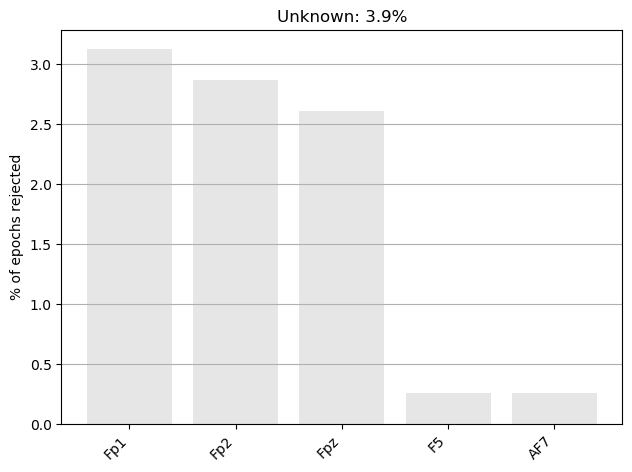

In [99]:
epochs.plot_drop_log()

In [100]:
epochs.info

<Info | 17 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fpz, Fp2, AF7, AF3, AF4, AF8, F7, F5, ...
    chs : list | 63 items (EEG: 63)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : Digitization | 66 items (3 Cardinal, 63 EEG)
    events : list | 0 items
    highpass : float | 0.5 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 40.0 Hz
    meas_date : tuple | 2019-08-05 21:50:29 GMT
    nchan : int | 63
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 500.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_

In [101]:
ica=ICA(n_components=20,max_pca_components=20,method='fastica').fit(epochs)

Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selection by number: 20 components
Fitting ICA took 6.7s.


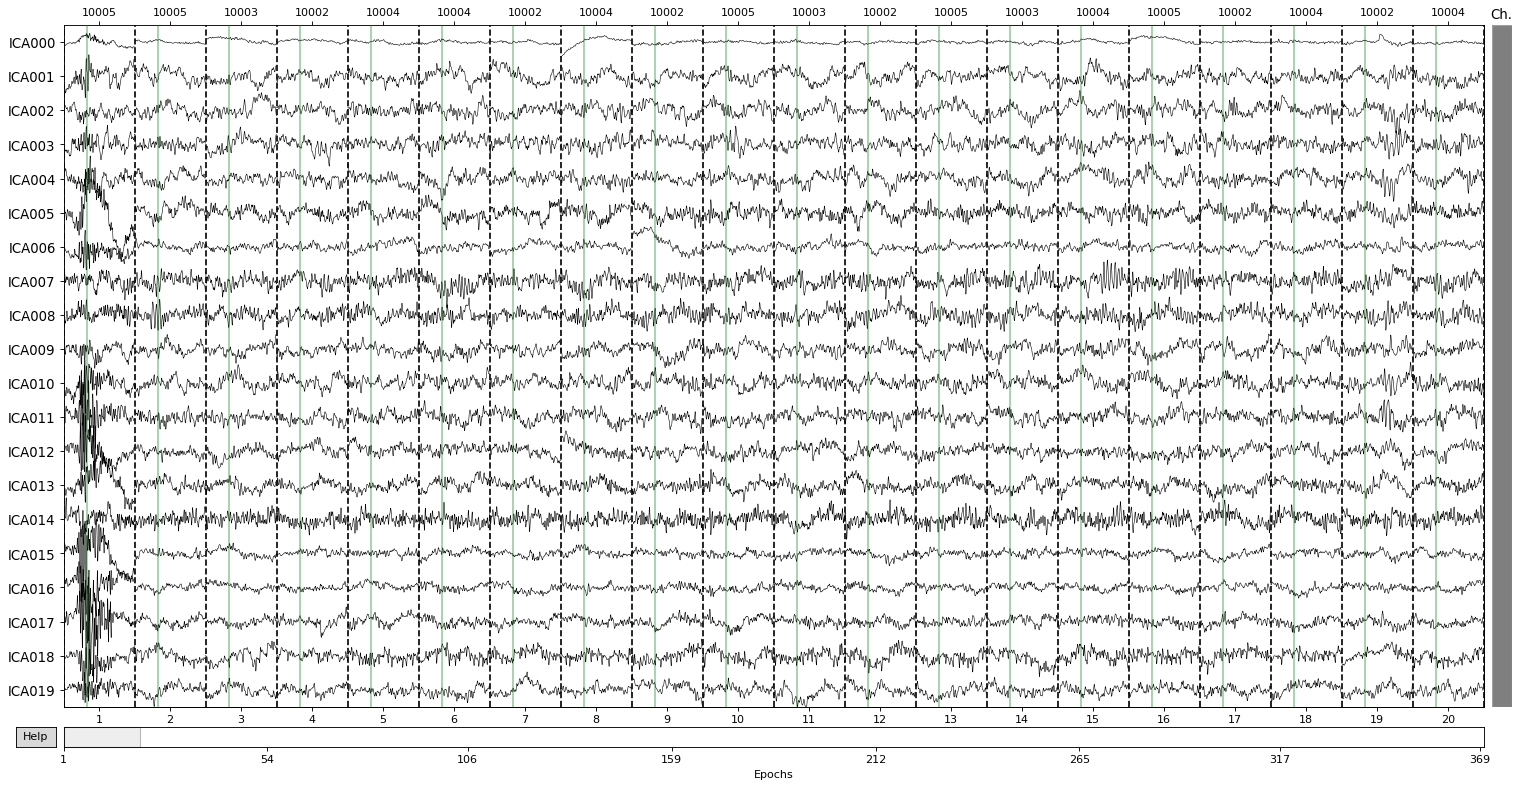

In [102]:
ica.plot_sources(inst=epochs)

In [103]:
ica.plot_components(inst=epochs)

[<Figure size 750x700 with 20 Axes>]

    Using multitaper spectrum estimation with 7 DPSS windows
369 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
369 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
369 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
369 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


In [104]:
ica.apply(epochs)

Transforming to ICA space (20 components)
Zeroing out 1 ICA components


<Epochs  |   369 events (all good), -0.5 - 1 sec, baseline off, ~133.4 MB, data loaded,
 'animal': 91
 'baby': 92
 'people': 93
 'scene': 93>

In [129]:
epochs.set_eeg_reference(ref_channels='average')
epochs.apply_baseline(None,0)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


<Epochs  |   369 events (all good), -0.5 - 1 sec, baseline off, ~133.4 MB, data loaded,
 'animal': 91
 'baby': 92
 'people': 93
 'scene': 93>

In [133]:
epochs.baseline()

TypeError: 'NoneType' object is not callable

In [125]:
evoked_animal=epochs['animal'].average()
evoked_baby=epochs['baby'].average()
evoked_people=epochs['people'].average()
evoked_scene=epochs['scene'].average()

In [126]:
picks = [epochs.ch_names.index(ch) for ch in ["PO4","PO3","PO7","PO8"]]#define electrode of interest
condition_index={'Animal':evoked_animal,'Baby':evoked_baby,'People':evoked_people,'Scene':evoked_scene} #set parameter for plot ERP

In [128]:
mne.viz.plot_compare_evokeds(condition_index,picks=picks,ci=0.95,gfp=None,legend='upper left',show_sensors='upper right')#plot compared ERP  

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


[<Figure size 800x600 with 2 Axes>]